In [ ]:
!pip install geopandas
!pip install shapely
!pip install contextily mapclassify
!pip install descartes

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx
from shapely import wkb

In [2]:
fp_accommodate = './data/accommodations.csv'
fp_zipcode = './data/zipcode.csv'
fp_depoi = './data/DE.txt'

In [3]:
df_acc = pd.read_csv(fp_accommodate,sep=';')
df_acc.head()

,id,shape,name,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,7071,0101000020E6100000CE823DD286D42A40DF415D2D8645...,BrightRoom with sunny greenview!,Bright,Pankow,Helmholtzplatz,Private room,42,2,197,2018-11-04,1.75,1,26
1,28268,0101000020E61000002780B1F59CF02A40D780769BB641...,Cozy Berlin Friedrichshain for1/6 p,Elena,Friedrichshain-Kreuzberg,Frankfurter Allee Sued FK,Entire home/apt,90,5,30,2017-08-02,0.33,1,55
2,42742,0101000020E6100000163B443574E12A40B0FE1CCD923F...,Spacious 35m2 in Central Apartment,Desiree,Friedrichshain-Kreuzberg,suedliche Luisenstadt,Private room,36,1,25,2018-10-01,0.32,2,217
3,57792,0101000020E610000029E507B1F7A72A40DB5F6F8D7036...,Bungalow mit Garten in Berlin Zehlendorf,Jo,Steglitz - Zehlendorf,Ostpreußendamm,Entire home/apt,49,2,3,2017-02-12,0.03,1,0
4,81081,0101000020E61000001269684E9FD42A40D3881DF25B46...,Beautiful Prenzlauer Berg Apt,Bernd+Katja :-),Pankow,Prenzlauer Berg Nord,Entire home/apt,66,3,238,2018-10-28,2.59,1,69


In [4]:
df_zip=pd.read_csv(fp_zipcode, sep=';')
df_zip.head()

,ogc_field,wkb_geometry,gml_id,spatial_name,spatial_alias,spatial_type
0,0,0103000020E6100000010000004B010000FCF457FB51BB...,re_postleit.10115,10115,10115,Polygon
1,4,0103000020E6100000010000004B0100005CBC8B2DD6C0...,re_postleit.10117,10117,10117,Polygon
2,16,0103000020E6100000010000000A01000051D9EA6F5DCE...,re_postleit.10179,10179,10179,Polygon
3,28,0103000020E610000001000000BD000000226EDBF3B1E7...,re_postleit.10247,10247,10247,Polygon
4,36,0103000020E61000000100000070010000812F82911707...,re_postleit.10315,10315,10315,Polygon


In [9]:
!head -n 1 {fp_depoi}

1529666	Bahnhof Grenzau	Bahnhof Grenzau	Bahnhof Grenzau	50.45715	7.66512	S	RSTN	DE		08	00	07143	07143032	0		231	Europe/Berlin	2020-01-08


In [10]:
df_acc['geometry']=df_acc.apply(lambda x: wkb.loads(x['shape'], hex=True), axis=1)

In [11]:
gdf = gpd.GeoDataFrame(df_acc, geometry=df_acc['geometry'], crs=4326)
gdf.head()

,id,shape,name,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,geometry
0,7071,0101000020E6100000CE823DD286D42A40DF415D2D8645...,BrightRoom with sunny greenview!,Bright,Pankow,Helmholtzplatz,Private room,42,2,197,2018-11-04,1.75,1,26,POINT (13.41509 52.54316)
1,28268,0101000020E61000002780B1F59CF02A40D780769BB641...,Cozy Berlin Friedrichshain for1/6 p,Elena,Friedrichshain-Kreuzberg,Frankfurter Allee Sued FK,Entire home/apt,90,5,30,2017-08-02,0.33,1,55,POINT (13.46995 52.51339)
2,42742,0101000020E6100000163B443574E12A40B0FE1CCD923F...,Spacious 35m2 in Central Apartment,Desiree,Friedrichshain-Kreuzberg,suedliche Luisenstadt,Private room,36,1,25,2018-10-01,0.32,2,217,POINT (13.44034 52.49667)
3,57792,0101000020E610000029E507B1F7A72A40DB5F6F8D7036...,Bungalow mit Garten in Berlin Zehlendorf,Jo,Steglitz - Zehlendorf,Ostpreußendamm,Entire home/apt,49,2,3,2017-02-12,0.03,1,0,POINT (13.32806 52.42531)
4,81081,0101000020E61000001269684E9FD42A40D3881DF25B46...,Beautiful Prenzlauer Berg Apt,Bernd+Katja :-),Pankow,Prenzlauer Berg Nord,Entire home/apt,66,3,238,2018-10-28,2.59,1,69,POINT (13.41528 52.54968)


In [12]:
gdf = gdf.to_crs(3857)

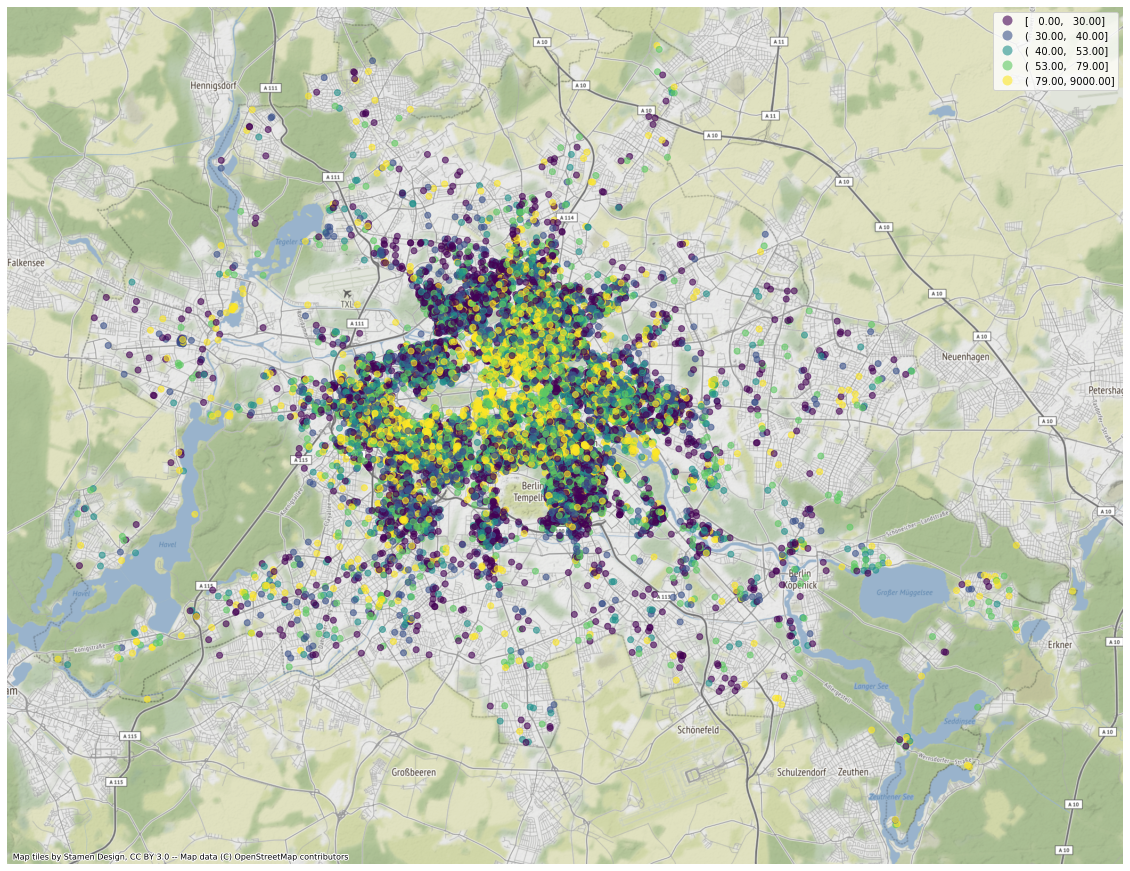

In [14]:
# run gdf.plot first. Then add basemap. It will crash.
f, ax = plt.subplots(1, figsize=(20,20))
gdf.plot(column='price', scheme='QUANTILES', alpha=0.6, ax=ax, legend=True)
# use the default Stamen Terrain web tiles
cx.add_basemap(ax, crs=gdf.crs.to_string())
ax.set_axis_off()
plt.show()

In [15]:
df_zip['geometry']=df_zip.apply(lambda x: wkb.loads(x['wkb_geometry'], hex=True), axis=1)

In [16]:
df_zip.head()

,ogc_field,wkb_geometry,gml_id,spatial_name,spatial_alias,spatial_type,geometry
0,0,0103000020E6100000010000004B010000FCF457FB51BB...,re_postleit.10115,10115,10115,Polygon,"POLYGON ((13.36585984657949 52.53565958104801,..."
1,4,0103000020E6100000010000004B0100005CBC8B2DD6C0...,re_postleit.10117,10117,10117,Polygon,"POLYGON ((13.37663404780158 52.50819300592241,..."
2,16,0103000020E6100000010000000A01000051D9EA6F5DCE...,re_postleit.10179,10179,10179,Polygon,"POLYGON ((13.4030566190892 52.51216766131019, ..."
3,28,0103000020E610000001000000BD000000226EDBF3B1E7...,re_postleit.10247,10247,10247,Polygon,"POLYGON ((13.45252954534141 52.51702256953737,..."
4,36,0103000020E61000000100000070010000812F82911707...,re_postleit.10315,10315,10315,Polygon,"POLYGON ((13.51385168756656 52.50377523916661,..."


In [17]:
gdf_zip = gpd.GeoDataFrame(df_zip, geometry=df_zip['geometry'], crs=4326)
gdf_zip = gdf_zip.to_crs(3857)

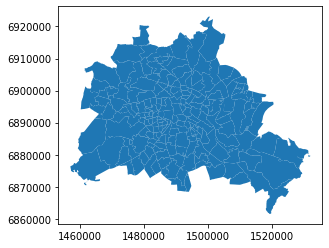

In [20]:
gdf_zip.plot()